In [1]:
import pandas as pd

# Load the provided dataset
file_path = 'transport_ireland.csv'
ireland_transport_data = pd.read_csv(file_path)

# Display the first few 
ireland_transport_data.head()


,STATISTIC,Statistic Label,TLIST(W1),Year,C03910V04662,Transport Traffic Site,C01198V01436,Weeks of the year,UNIT,VALUE
0,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,1,Week 01,Number,23838.0
1,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,2,Week 02,Number,38353.0
2,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,3,Week 03,Number,39973.0
3,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,4,Week 04,Number,40314.0
4,THA22C01,Average weekly volume of heavy goods vehicles,2019,2019,10,Selected traffic sites - Dublin,5,Week 05,Number,40709.0


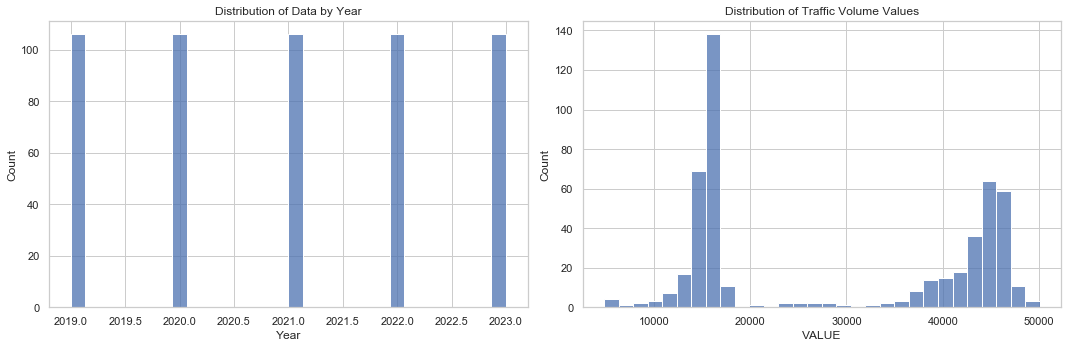

,TLIST(W1),Year,C03910V04662,C01198V01436,VALUE
count,530.00000,530.00000,530.000000,530.00000,496.000000
mean,2021.00000,2021.00000,15.000000,27.00000,28891.663306
std,1.41555,1.41555,5.004724,15.31151,14377.595591
min,2019.00000,2019.00000,10.000000,1.00000,4882.000000
25%,2020.00000,2020.00000,10.000000,14.00000,15726.500000
50%,2021.00000,2021.00000,15.000000,27.00000,17129.000000
75%,2022.00000,2022.00000,20.000000,40.00000,44526.250000
max,2023.00000,2023.00000,20.000000,53.00000,50049.000000


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting up visualization style
sns.set(style="whitegrid")

# Descriptive statistics of the dataset
descriptive_stats = ireland_transport_data.describe()

# Plotting distributions of numeric data
plt.figure(figsize=(15, 5))

# Histogram for the 'Year'
plt.subplot(1, 2, 1)
sns.histplot(ireland_transport_data['Year'], kde=False, bins=30)
plt.title('Distribution of Data by Year')

# Histogram for the 'VALUE'
plt.subplot(1, 2, 2)
sns.histplot(ireland_transport_data['VALUE'], kde=False, bins=30)
plt.title('Distribution of Traffic Volume Values')

plt.tight_layout()
plt.show()

descriptive_stats


In [5]:
# Check for missing values in the Irish dataset
ireland_missing_values = ireland_transport_data.isnull().sum()

# Check the data types and unique values for each column
ireland_data_types = ireland_transport_data.dtypes
ireland_unique_values = ireland_transport_data.nunique()

# Output the findings
print("Missing Values in Irish Dataset:\n", ireland_missing_values)
print("\nData Types in Irish Dataset:\n", ireland_data_types)
print("\nUnique Values in Irish Dataset:\n", ireland_unique_values)


Missing Values in Irish Dataset:
 STATISTIC                  0
Statistic Label            0
TLIST(W1)                  0
Year                       0
C03910V04662               0
Transport Traffic Site     0
C01198V01436               0
Weeks of the year          0
UNIT                       0
VALUE                     34
dtype: int64

Data Types in Irish Dataset:
 STATISTIC                  object
Statistic Label            object
TLIST(W1)                   int64
Year                        int64
C03910V04662                int64
Transport Traffic Site     object
C01198V01436                int64
Weeks of the year          object
UNIT                       object
VALUE                     float64
dtype: object

Unique Values in Irish Dataset:
 STATISTIC                   1
Statistic Label             1
TLIST(W1)                   5
Year                        5
C03910V04662                2
Transport Traffic Site      2
C01198V01436               53
Weeks of the year          53
UNIT

In [7]:
# Impute missing values in the 'VALUE' column with the median
median_value = ireland_transport_data['VALUE'].median()
ireland_transport_data['VALUE'].fillna(median_value, inplace=True)

# Check if there are any missing values left
missing_values_after_imputation = ireland_transport_data['VALUE'].isnull().sum()
print("Missing values after imputation in 'VALUE' column:", missing_values_after_imputation)


Missing values after imputation in 'VALUE' column: 0


In [18]:
# Load the two NYC Traffic Volume Counts datasets
file_path_2011_2012 = 'Traffic_Counts_2011-2012.csv'
file_path_2012_2013 = 'Traffic_Counts_2012-2013.csv'

nyc_traffic_2011_2012 = pd.read_csv(file_path_2011_2012)
nyc_traffic_2012_2013 = pd.read_csv(file_path_2012_2013)

# Display the first few rows of each dataset to understand their structure
nyc_traffic_2011_2012_head = nyc_traffic_2011_2012.head()
nyc_traffic_2012_2013_head = nyc_traffic_2012_2013.head()

(nyc_traffic_2011_2012_head, nyc_traffic_2012_2013_head)


(   ID  GIS ID  Roadway Name         From                To Direction  \
 0   1   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 1   2   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 2   3   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 3   4   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 4   5   15540  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 
          Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  2:00-3:00PM  \
 0  01/09/2012             20           10           11  ...        104.0   
 1  01/10/2012             21           16            8  ...        102.0   
 2  01/11/2012             27           14            6  ...        115.0   
 3  01/12/2012             22            7            7  ...         71.0   
 4  01/13/2012             31           17            7  ...        113.0   
 
    3:00-4:00PM  4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:00PM  \
 0        105.0        14

In [19]:
import pandas as pd

# Concatenating the datasets
combined_nyc_traffic = pd.concat([nyc_traffic_2011_2012, nyc_traffic_2012_2013])

# Checking the combined dataset
combined_nyc_traffic_info = combined_nyc_traffic.info()
combined_nyc_traffic_head = combined_nyc_traffic.head()

(combined_nyc_traffic_info, combined_nyc_traffic_head)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 5944
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   ID             9338 non-null   int64  
 1   GIS ID         3393 non-null   float64
 2   Roadway Name   9338 non-null   object 
 3   From           9338 non-null   object 
 4   To             9338 non-null   object 
 5   Direction      9338 non-null   object 
 6   Date           9338 non-null   object 
 7   12:00-1:00 AM  9338 non-null   int64  
 8   1:00-2:00AM    9338 non-null   int64  
 9   2:00-3:00AM    9338 non-null   float64
 10  3:00-4:00AM    9338 non-null   float64
 11  4:00-5:00AM    9338 non-null   int64  
 12  5:00-6:00AM    9338 non-null   float64
 13  6:00-7:00AM    9338 non-null   int64  
 14  7:00-8:00AM    9338 non-null   float64
 15  8:00-9:00AM    9338 non-null   float64
 16  9:00-10:00AM   9338 non-null   int64  
 17  10:00-11:00AM  9338 non-null   int64  
 18  11:00-12

(None,
    ID   GIS ID  Roadway Name         From                To Direction  \
 0   1  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 1   2  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 2   3  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 3   4  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 4   5  15540.0  BEACH STREET  UNION PLACE  VAN DUZER STREET        NB   
 
          Date  12:00-1:00 AM  1:00-2:00AM  2:00-3:00AM  ...  3:00-4:00PM  \
 0  01/09/2012             20           10         11.0  ...        105.0   
 1  01/10/2012             21           16          8.0  ...         98.0   
 2  01/11/2012             27           14          6.0  ...        115.0   
 3  01/12/2012             22            7          7.0  ...        127.0   
 4  01/13/2012             31           17          7.0  ...        126.0   
 
    4:00-5:00PM  5:00-6:00PM  6:00-7:00PM  7:00-8:00PM  8:00-9:00PM  \
 0        14

In [20]:
# Convert 'Date' column to datetime format
combined_nyc_traffic['Date'] = pd.to_datetime(combined_nyc_traffic['Date'])

# Handling missing values
# For numeric columns like 'GIS ID' and 'Segment ID', you can fill missing values with a placeholder like 0 or a statistical measure like the mean.
combined_nyc_traffic['GIS ID'].fillna(0, inplace=True)
combined_nyc_traffic['Segment ID'].fillna(0, inplace=True)

# Verify changes
combined_nyc_traffic.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 9338 entries, 0 to 5944
Data columns (total 32 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   ID             9338 non-null   int64         
 1   GIS ID         9338 non-null   float64       
 2   Roadway Name   9338 non-null   object        
 3   From           9338 non-null   object        
 4   To             9338 non-null   object        
 5   Direction      9338 non-null   object        
 6   Date           9338 non-null   datetime64[ns]
 7   12:00-1:00 AM  9338 non-null   int64         
 8   1:00-2:00AM    9338 non-null   int64         
 9   2:00-3:00AM    9338 non-null   float64       
 10  3:00-4:00AM    9338 non-null   float64       
 11  4:00-5:00AM    9338 non-null   int64         
 12  5:00-6:00AM    9338 non-null   float64       
 13  6:00-7:00AM    9338 non-null   int64         
 14  7:00-8:00AM    9338 non-null   float64       
 15  8:00-9:00AM    9338 n

In [22]:
# Columns representing hourly traffic counts
hourly_columns = ['12:00-1:00 AM', '1:00-2:00AM', '2:00-3:00AM', '3:00-4:00AM', '4:00-5:00AM', 
                  '5:00-6:00AM', '6:00-7:00AM', '7:00-8:00AM', '8:00-9:00AM', '9:00-10:00AM', 
                  '10:00-11:00AM', '11:00-12:00PM', '12:00-1:00PM', '1:00-2:00PM', '2:00-3:00PM', 
                  '3:00-4:00PM', '4:00-5:00PM', '5:00-6:00PM', '6:00-7:00PM', '7:00-8:00PM', 
                  '8:00-9:00PM', '9:00-10:00PM', '10:00-11:00PM', '11:00-12:00AM']

# Adding a new column for total daily traffic volume
combined_nyc_traffic['Total Daily Traffic'] = combined_nyc_traffic[hourly_columns].sum(axis=1)


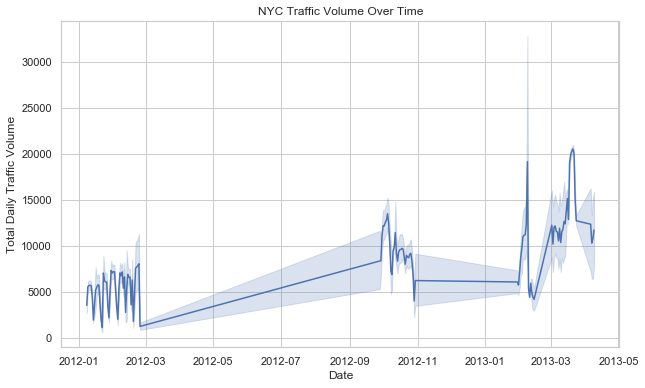

In [23]:
# Visualization
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total Daily Traffic', data=combined_nyc_traffic)
plt.title('NYC Traffic Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Total Daily Traffic Volume')
plt.show()
